In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [7]:
import cv2

In [8]:
# utilities
import numpy as np # linear algebra
import pandas as pd # data processing
import pickle
import random

# visualization
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# tensorflow
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation

from tensorflow.keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

import os
# print(os.listdir("../input"))

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
path="/content/drive/MyDrive/NIH_dataset_clean/Resources/chest_xray/train/"

In [11]:
def img_to_array(path, category_no, X, y):
    for p in os.listdir(path):
        if p == ".DS_Store":
            continue
        #print(p)
        img = cv2.imread(os.path.join(path, p), cv2.IMREAD_GRAYSCALE)
        img_np = cv2.resize(img, dsize = (150, 150))
        X.append(img_np)
        y.append(category_no)

In [12]:
path_train="/content/drive/MyDrive/NIH_dataset_clean/Resources/chest_xray/train/"


category_list = ["NORMAL", "PNEUMONIA"]

X_train = []
y_train = []

for i in range(len(category_list)):
    img_to_array(path_train + category_list[i], i, X_train, y_train)
    
X_train = np.array(X_train).reshape(-1,150,150,1)
y_train = np.array(y_train)

In [13]:
path_val = "/content/drive/MyDrive/NIH_dataset_clean/Resources/chest_xray/val/"

X_val = []
y_val = []

for i in range(len(category_list)):
    img_to_array(path_val + category_list[i], i, X_val, y_val)
    
X_val = np.array(X_val).reshape(-1,150,150,1)
y_val = np.array(y_val)

In [14]:
path_test = "/content/drive/MyDrive/NIH_dataset_clean/Resources/chest_xray/test/"

category_list = ["NORMAL", "PNEUMONIA"]
X_test = []
y_test = []

for i in range(len(category_list)):
    img_to_array(path_test + category_list[i], i, X_test, y_test)
    
X_test = np.array(X_test).reshape(-1,150,150,1)
y_test = np.array(y_test)

In [15]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [33]:
datagen = ImageDataGenerator(
        featurewise_center = False,  # set input mean to 0 over the dataset
        samplewise_center = False,  # set each sample mean to 0
        featurewise_std_normalization = False,  # divide inputs by std of the dataset
        samplewise_std_normalization = False,  # divide each input by its std
        zca_whitening = False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip = False)  # randomly flip images


datagen.fit(X_train)

In [34]:
model = Sequential([
    Conv2D(32, (3,3), activation = "relu", input_shape = (150,150,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation = "relu"),
    Dropout(0.1),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation = "relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation = "relu"),
    Dropout(0.2),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation = "relu"),
    Dropout(0.2),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation = "relu"),
    Dropout(0.2),
    Dense(1, activation = "sigmoid")
])

In [35]:
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [36]:
history = model.fit(datagen.flow(X_train, y_train, batch_size = 32), epochs = 50)#,validation_data = datagen.flow(X_val, y_val)

Epoch 1/50
163/163 [==============================] - 17s 91ms/step - loss: 0.3815 - accuracy: 0.8476
Epoch 2/50
163/163 [==============================] - 15s 91ms/step - loss: 0.2563 - accuracy: 0.8923
Epoch 3/50
163/163 [==============================] - 15s 92ms/step - loss: 0.2289 - accuracy: 0.9057
Epoch 4/50
163/163 [==============================] - 15s 91ms/step - loss: 0.1987 - accuracy: 0.9237
Epoch 5/50
163/163 [==============================] - 15s 91ms/step - loss: 0.1899 - accuracy: 0.9296
Epoch 6/50
163/163 [==============================] - 15s 91ms/step - loss: 0.1688 - accuracy: 0.9385
Epoch 7/50
163/163 [==============================] - 15s 91ms/step - loss: 0.1611 - accuracy: 0.9400
Epoch 8/50
163/163 [==============================] - 15s 91ms/step - loss: 0.1595 - accuracy: 0.9396
Epoch 9/50
163/163 [==============================] - 15s 91ms/step - loss: 0.1518 - accuracy: 0.9475
Epoch 10/50
163/163 [==============================] - 15s 91ms/step - loss: 0.155

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      320       
                                                                 
 batch_normalization_10 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 dropout_8 (Dropout)         (None, 72, 72, 64)        0         
                                                                 
 batch_normalization_11 (Bat  (None, 72, 72, 64)      

In [38]:
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f" % (accuracy*100))

20/20 [==============================] - 1s 24ms/step - loss: 1.3728 - accuracy: 0.8301
Accuracy: 83.01


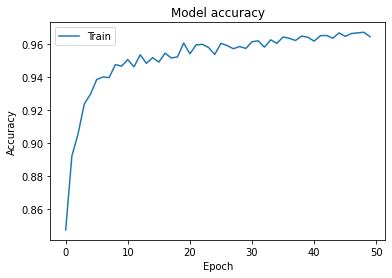

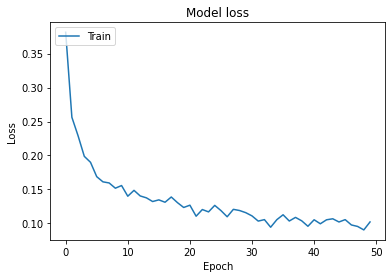

In [39]:
plt.plot(history.history["accuracy"])
#plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

plt.plot(history.history["loss"])
#plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

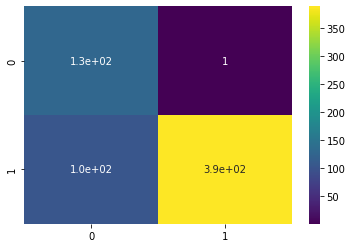

In [40]:
sns.heatmap(confusion_matrix(np.round(model.predict(X_test)), y_test), cmap = "viridis", annot = True)

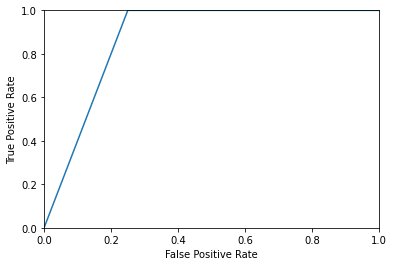

In [41]:
y_val_prob=model.predict(X_val)
from sklearn.metrics import roc_curve,roc_auc_score

fpr , tpr , thresholds = roc_curve ( y_val , y_val_prob)
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr,tpr) 